# Poisson Process
Generate a Poisson process with rate λ = 1 for a period of time of length T ≥ 10, 000.  
Pick a point in time from a uniform distribution within the interval [1,10000].  
Record the length of the interval (between two consecutive Poisson occurrences) that includes the chosen point in time.  
Repeat the experiment 1000 times.  
Compute the average length of the intervals you recorded.  
Explain your result.

## Solution

In [1]:
import random
import numpy as np
from scipy.stats import erlang
from scipy.stats import expon
import matplotlib.pyplot as plt

In [2]:
def find_interval(array, value):
    for i in range(len(array)):
        if array[i] < value:
            continue
        return array[i] - array[i - 1]

In [3]:
T = 15000
rate = 1 # lambda

interval_length = 0
intervals = []
for i in range(1000):
    # Generate Poisson Process
    total_time = 0
    time_series = []
    while total_time <= T:
        t = expon.rvs(scale = 1 / rate)
        total_time += t
        time_series.append(total_time)
    # Randomly select a point
    point = random.uniform(1, 10000)
    temp = find_interval(time_series, point)
    intervals.append(temp)
    interval_length += temp
print("The average length of the intervals is ", interval_length / 1000)

The average length of the intervals is  2.0715713134274765


The time intervals of the Poisson Process follow the **exponential distribution**. Also, the sum of exponential distributions is an **Erlang distribution** with parameters of 2 and $\lambda$. The mean of Erlang (2, $\lambda$) is $\frac{2}{\lambda}$. In this case, $\lambda=1$, so the theoretical mean is **2**.

## Probability Distribution Function

Text(0, 0.5, 'Density')

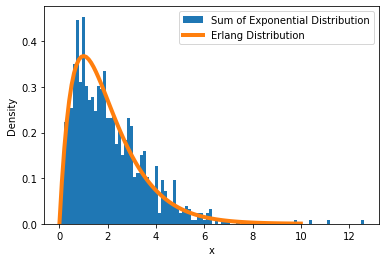

In [4]:
x_n = np.linspace(0, 10, 100)
plt.hist(intervals, bins=100, density = True, label = 'Sum of Exponential Distribution')
plt.plot(x_n, erlang.pdf(x_n, 2, scale = 1 / rate), lw = 4, label = 'Erlang Distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')

Compare the PDFs of an ideal Erlang (2, $\lambda$) and the time intervals. The figure below shows that the time intervals, which are the sum of exponential distributions, follow an Erlang distribution.

## Acknowledgment
Special thanks to Ms. Linjun DAI for helping me understand the merging process of Erlang distributions. 